In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test= pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ytrain=train['label']
Xtrain=train.drop(columns='label')

Text(0.5, 1.0, 'No of digits in each class')

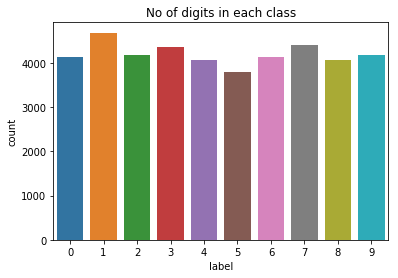

In [6]:
sns.countplot(ytrain)
plt.title("No of digits in each class")

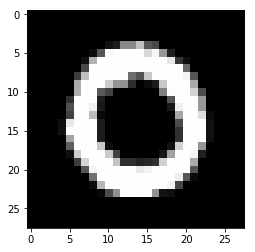

In [7]:
img=np.array(Xtrain.iloc[1])
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')

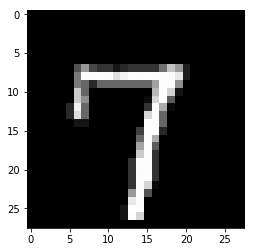

In [8]:
img=np.array(Xtrain.iloc[6])
img=img.reshape(28,28)
plt.imshow(img,cmap='gray')

## Normalization

In [9]:
Xtrain=Xtrain/255.0
test=test/255.0

## Reshaping

In [10]:
Xtrain=Xtrain.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
print(Xtrain.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


## Encoding Target Variable

In [11]:
from keras.utils.np_utils import to_categorical
ytrain=to_categorical(ytrain)
ytrain.shape

Using TensorFlow backend.


(42000, 10)

In [12]:
from sklearn.model_selection import train_test_split
XTrain,Xval,yTrain,yval=train_test_split(Xtrain,ytrain,test_size = 0.1, random_state=32)
print(XTrain.shape)
print(Xval.shape)
print(yTrain.shape)
print(yval.shape)

(37800, 28, 28, 1)
(4200, 28, 28, 1)
(37800, 10)
(4200, 10)


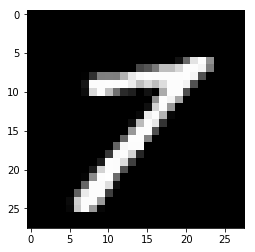

In [13]:
plt.imshow(XTrain[1][:,:,0],cmap='gray')

## **Model Building**

In [14]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dropout,Dense,Conv2D,MaxPool2D,Flatten
from keras.optimizers import Adam,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [15]:
Dense?

In [16]:
model=Sequential()

#layer1
model.add(Conv2D(filters=8,kernel_size=(5,5),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#layer2
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#layer3
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))

#output Layer
model.add(Dense(10,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 784)              

In [17]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
epochs = 10 
batch_size = 250

## Data Augmentation

In [18]:
ImageDataGenerator?


In [19]:
datagen=ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(XTrain)

In [20]:
history=model.fit_generator(datagen.flow(XTrain,yTrain,batch_size=batch_size),
                            epochs=epochs,validation_data=(Xval,yval),steps_per_epoch=XTrain.shape[0]//batch_size)

Epoch 1/10
151/151 [==============================] - 20s 133ms/step - loss: 2.2002 - accuracy: 0.1786 - val_loss: 1.8650 - val_accuracy: 0.3017
Epoch 2/10
151/151 [==============================] - 20s 135ms/step - loss: 1.9969 - accuracy: 0.2756 - val_loss: 1.5108 - val_accuracy: 0.5112
Epoch 3/10
151/151 [==============================] - 20s 133ms/step - loss: 1.8520 - accuracy: 0.3360 - val_loss: 1.1342 - val_accuracy: 0.6893
Epoch 4/10
151/151 [==============================] - 20s 131ms/step - loss: 1.7425 - accuracy: 0.3861 - val_loss: 0.9432 - val_accuracy: 0.7536
Epoch 5/10
151/151 [==============================] - 20s 135ms/step - loss: 1.6841 - accuracy: 0.4066 - val_loss: 0.8577 - val_accuracy: 0.7693
Epoch 6/10
151/151 [==============================] - 20s 131ms/step - loss: 1.6412 - accuracy: 0.4230 - val_loss: 0.7422 - val_accuracy: 0.7936
Epoch 7/10
151/151 [==============================] - 20s 131ms/step - loss: 1.6007 - accuracy: 0.4393 - val_loss: 0.6903 - val_ac

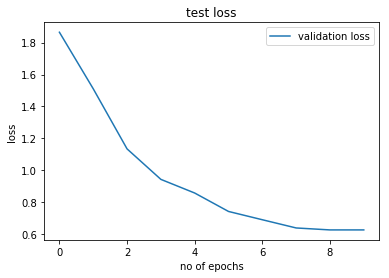

In [21]:
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')
plt.title('test loss')
plt.legend()
plt.show()

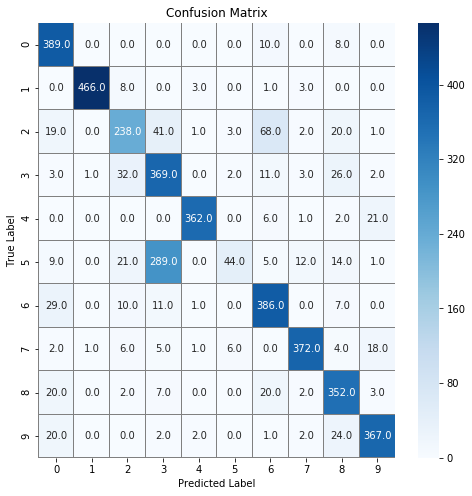

In [22]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(Xval)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(yval,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Blues",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()